# Networks creation
For this project the key was to analyze the network of actors and directors. To do that we created two networks one consisted only of actors connected between each other based on the movies in which they were playing togeter as well as directors network where each of the node represented by the director were conected by edge (actor) withwhom director was working with. 

In [1]:
import numpy as np
import operator
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import operator

import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import plotly.plotly as py
from plotly.graph_objs import *

import networkx as nx
init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
import csv

main_movies = {}


with open('imdb_dataset.tsv') as csvfile:
    reader = csv.DictReader(csvfile, delimiter = "\t")
    for entry in reader:
        main_movies[
            entry["title"]
        ] = {
        "director":     entry["director"],
        "rating":       entry["rating"],
        "votes":        entry["votes"],
        "year":         entry["year"],
        "genre":        entry["genre"],
        "gross":        entry["gross"],
        "budget":       entry["budget"],
        "run-time":     entry["run-time"] ,
        "actor1":       entry["actor1"],
        "actor1_rank":  entry["actor1_rank"],
        "actor1_sex":   entry["actor1_sex"],
        "actor2":       entry["actor2"],
        "actor2_rank":  entry["actor2_rank"],
        "actor2_sex":   entry["actor2_sex"],
        "actor3":       entry["actor3"],
        "actor3_rank":  entry["actor3_rank"],
        "actor3_sex":   entry["actor3_sex"],
        "actor4":       entry["actor4"],
        "actor4_rank":  entry["actor4_rank"],
        "actor4_sex":   entry["actor4_sex"],
        "actor5":       entry["actor5"],
        "actor5_rank":  entry["actor5_rank"],
        "actor5_sex":   entry["actor5_sex"],
        "actor6":       entry["actor6"],
        "actor6_rank":  entry["actor6_rank"],
        "actor6_sex":   entry["actor6_sex"],
        "plot":         entry["plot"]
        }

In [3]:
for movie in main_movies.keys()[0:30]:
    print movie," director: ", main_movies[movie]["director"]

Fired Up! (2009)  director:  Will Gluck
Least Among Saints (2012)  director:  Martin Papazian
Drop Dead Gorgeous (1999)  director:  Michael Patrick Jann
Mozart and the Whale (2005)  director:  Petter Næss
The Peacemaker (1997)  director:  Mimi Leder
Holy Rollers (2010)  director:  Kevin Asch
X-Men: Days of Future Past (2014)  director:  Bryan Singer
Article 99 (1992)  director:  Howard Deutch
Frozen (2013/I)  director:  Chris (II) Buck
FernGully: The Last Rainforest (1992)  director:  Bill Kroyer
The Big Short (2015)  director:  Adam (I) McKay
The Covenant (2006)  director:  Renny Harlin
Glorious 39 (2009)  director:  Stephen (I) Poliakoff
Like Minds (2006)  director:  Gregory Read
Krampus (2015/I)  director:  Michael (II) Dougherty
Encino Man (1992)  director:  Les Mayfield
The Adventures of Baron Munchausen (1988)  director:  Terry Gilliam
An Unfinished Life (2005)  director:  Lasse Hallström
A Perfect World (1993)  director:  Clint Eastwood
Margin Call (2011)  director:  J.C. Chando

In [4]:
print "Number of movies in dataset"
print len(main_movies)+1


Number of movies in dataset
4377


In [5]:
actors_network = nx.Graph()

for movie in main_movies:
    actors_network.add_node(main_movies[movie]["actor1"]) 
    actors_network.add_node(main_movies[movie]["actor2"]) 
    actors_network.add_node(main_movies[movie]["actor3"])
    actors_network.add_node(main_movies[movie]["actor4"])
    actors_network.add_node(main_movies[movie]["actor5"])
    actors_network.add_node(main_movies[movie]["actor6"])

for movie in main_movies:
    actors_network.add_edge(main_movies[movie]["actor1"], main_movies[movie]["actor2"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor1"], main_movies[movie]["actor3"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor1"], main_movies[movie]["actor4"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor1"], main_movies[movie]["actor5"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor1"], main_movies[movie]["actor6"], weight =0)
    
    actors_network.add_edge(main_movies[movie]["actor2"], main_movies[movie]["actor3"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor2"], main_movies[movie]["actor4"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor2"], main_movies[movie]["actor5"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor2"], main_movies[movie]["actor6"], weight =0)
    
    actors_network.add_edge(main_movies[movie]["actor3"], main_movies[movie]["actor4"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor3"], main_movies[movie]["actor5"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor3"], main_movies[movie]["actor6"], weight =0)
    
    actors_network.add_edge(main_movies[movie]["actor4"], main_movies[movie]["actor5"], weight =0)
    actors_network.add_edge(main_movies[movie]["actor4"], main_movies[movie]["actor6"], weight =0)
    
    actors_network.add_edge(main_movies[movie]["actor5"], main_movies[movie]["actor6"], weight =0)
    
for movie in main_movies: 
    if actors_network.has_edge(main_movies[movie]["actor1"], main_movies[movie]["actor2"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor1"]][main_movies[movie]["actor2"]]['weight'] += 1               
    if actors_network.has_edge(main_movies[movie]["actor1"], main_movies[movie]["actor3"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor1"]][main_movies[movie]["actor3"]]['weight'] += 1
    if actors_network.has_edge(main_movies[movie]["actor1"], main_movies[movie]["actor4"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor1"]][main_movies[movie]["actor4"]]['weight'] += 1
    if actors_network.has_edge(main_movies[movie]["actor1"], main_movies[movie]["actor5"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor1"]][main_movies[movie]["actor5"]]['weight'] += 1
    if actors_network.has_edge(main_movies[movie]["actor1"], main_movies[movie]["actor6"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor1"]][main_movies[movie]["actor6"]]['weight'] += 1
                
                
    if actors_network.has_edge(main_movies[movie]["actor2"], main_movies[movie]["actor3"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor2"]][main_movies[movie]["actor3"]]['weight'] += 1                
    if actors_network.has_edge(main_movies[movie]["actor2"], main_movies[movie]["actor4"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor2"]][main_movies[movie]["actor4"]]['weight'] += 1
    if actors_network.has_edge(main_movies[movie]["actor2"], main_movies[movie]["actor5"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor2"]][main_movies[movie]["actor5"]]['weight'] += 1
    if actors_network.has_edge(main_movies[movie]["actor2"], main_movies[movie]["actor6"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor2"]][main_movies[movie]["actor6"]]['weight'] += 1
                
                
    if actors_network.has_edge(main_movies[movie]["actor3"], main_movies[movie]["actor4"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor3"]][main_movies[movie]["actor4"]]['weight'] += 1  
    if actors_network.has_edge(main_movies[movie]["actor3"], main_movies[movie]["actor5"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor3"]][main_movies[movie]["actor5"]]['weight'] += 1 
    if actors_network.has_edge(main_movies[movie]["actor3"], main_movies[movie]["actor6"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor3"]][main_movies[movie]["actor6"]]['weight'] += 1 
                
                
    if actors_network.has_edge(main_movies[movie]["actor4"], main_movies[movie]["actor5"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor4"]][main_movies[movie]["actor5"]]['weight'] += 1 
    if actors_network.has_edge(main_movies[movie]["actor4"], main_movies[movie]["actor6"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor4"]][main_movies[movie]["actor6"]]['weight'] += 1
                
    if actors_network.has_edge(main_movies[movie]["actor5"], main_movies[movie]["actor6"]):
                # we added this one before, just increase the weight by one
                actors_network[main_movies[movie]["actor5"]][main_movies[movie]["actor6"]]['weight'] += 1 
                
num_of_nodes = actors_network.number_of_nodes()
print('Number of nodes: ' + str(num_of_nodes))

num_of_links = actors_network.number_of_edges()
print('Number of links: ' + str(num_of_links))

num_of_links_sorted = sorted(actors_network.edges(data=True), key=lambda (source,target,data): data['weight'], reverse=True)

print ('\nMost frequent pairs of actors')
for ii in num_of_links_sorted[0:30]:
    print(ii[0] + ' and ' + str(ii[1]) +' '+ str(ii[2]))

Number of nodes: 4663
Number of links: 62192

Most frequent pairs of actors
Adam Sandler and Rob Schneider {'weight': 13}
Jim Cummings and Frank Welker {'weight': 8}
Kevin James and Adam Sandler {'weight': 8}
Daniel Radcliffe and Tom Felton {'weight': 8}
Adam Sandler and Steve Buscemi {'weight': 8}
John Cusack and Joan Cusack {'weight': 7}
Quentin Tarantino and Samuel L. Jackson {'weight': 6}
Johnny Depp and Helena Bonham Carter {'weight': 6}
George Clooney and Matt Damon {'weight': 6}
Matt Damon and Ben Affleck {'weight': 6}
Nicole Kidman and Tom Cruise {'weight': 6}
James Franco and Seth Rogen {'weight': 6}
Jonah Hill and Seth Rogen {'weight': 5}
Kevin Smith and Ben Affleck {'weight': 5}
Kevin Smith and Ethan Suplee {'weight': 5}
Bill Nighy and Martin Freeman {'weight': 5}
Samuel L. Jackson and Bruce Willis {'weight': 5}
George Clooney and Brad Pitt {'weight': 5}
Sylvester Stallone and Dolph Lundgren {'weight': 5}
Danny Trejo and Steve Buscemi {'weight': 5}
Matt Damon and Casey Affle

As we may observe the network of actors is consisted of 4663 nodes representing actors. They are connected between each other 62192 times. Interesting for us was to present who was playing the most frequent with whom. We may see that amount of actors who were playing together in many movies is very big wich means that the network is very dense. Recrod is Adam Sandler and Rob Schneider who were playing together 13 times. It is showing that they are good friends and this fact is also confirmed by the information which you may find on your own. Sandler is playing in almost every Schneider movie (Schneider is often porducer and actor in the same time) 

Daniel Radcliffe and Tom Felton are also often together. This is mainly because of the Harry Potter movies in which they were playing. 8 movies 8 times they were together. 

In [6]:
pos=nx.spring_layout(actors_network,k=.12)

In [7]:
nodeID = actors_network.node.keys()
nodeID.sort()

In [8]:
centralScore = nx.betweenness_centrality(actors_network)


In [9]:
# print centralScore

In [10]:
def scatter_nodes(pos, labels=None, color='rgb(152, 0, 0)', size=8, opacity=1):
    # pos is the dict of node positions
    # labels is a list  of labels of len(pos), to be displayed when hovering the mouse over the nodes
    # color is the color for nodes. When it is set as None the Plotly default color is used
    # size is the size of the dots representing the nodes
    # opacity is a value between [0,1] defining the node color opacity

    trace = go.Scatter(x=[], 
                    y=[],  
                    mode='markers', 
                    marker=dict(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale='Greens',
        reversescale=True,
        color=[], 
        size=2,
        sizeref = 0.5,
        colorbar=dict(
            thickness=15,
            title='Betweeenness Centrality',
            xanchor='left',
            titleside='right'
        ),
    line=dict(width=2)))
    for nd in nodeID:
        trace['x'].append(pos[nd][0])
        trace['y'].append(pos[nd][1])
        trace['marker']['color'].append(centralScore[nd])
    attrib=dict(name='', text=labels , hoverinfo='text', opacity=opacity) # a dict of Plotly node attributes
    trace=dict(trace, **attrib)# concatenate the dict trace and attrib
    trace['marker']['size']=size

    return trace 

In [11]:
def scatter_edges(G, pos, line_color='#a3a3c2', line_width=1, opacity=.2):
    trace = go.Scatter(x=[], 
                    y=[], 
                    mode='lines',
                   )
    for edge in G.edges():
        trace['x'] += [pos[edge[0]][0],pos[edge[1]][0], None]
        trace['y'] += [pos[edge[0]][1],pos[edge[1]][1], None]  
        trace['hoverinfo']='none'
        trace['line']['width']=line_width
        if line_color is not None: # when it is None a default Plotly color is used
            trace['line']['color']=line_color
    return trace 

In [12]:
# Node label information available on hover.
labels = []
for nd in nodeID:
      labels.append(actors_network.node[nd])

In [13]:
trace1=scatter_edges(actors_network, pos)
trace2=scatter_nodes(pos, labels=labels)

In [14]:
width=1200
height=1000
axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title='' 
          )
layout=go.Layout(title= 'Actors Network',
    showlegend=False,
    autosize=False,
    width=width,
    height=height,
    xaxis=dict(
        titlefont=dict(
        size=14,
        color='#7f7f7f'),
        showline=False,
        showticklabels=False,
        zeroline=False
    ),
    yaxis=YAxis(axis),
    margin=Margin(
        l=40,
        r=40,
        b=85,
        t=100,
        pad=0,
       
    ),
    hovermode='closest',
    plot_bgcolor='#EFECEA', #set background color            
    )


data=Data([trace1, trace2])

fig = Figure(data=data, layout=layout)

In [15]:
def make_annotations(pos, text, font_size=14, font_color='rgb(25,25,25)'):
    L=len(pos)
    if len(text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = Annotations()
    for nd in nodeID:
        annotations.append(
            Annotation(
                text="",
                x=pos[nd][0], y=pos[nd][1],
                xref='x1', yref='y1',
                font=dict(color= font_color, size=font_size),
                showarrow=False)
        )
    return annotations  

In [16]:
fig['layout'].update(annotations=make_annotations(pos, labels))  
#py.sign_in('', '')
iplot(fig, filename='Actors_Network')


# Printing to file in extra webbrowser window.
# py.image.save_as(fig, filename='a-simple-plot.png')
# from IPython.display import Image
# Image('a-simple-plot.png')
# import plotly.offline as offline
# offline.plot(fig,
#             image='png')

In [17]:
# Betweenness centrality for 'actors_network'
between_centrality = nx.betweenness_centrality(actors_network)

# Go through 'between_centrality' and add to two lists (names and values)
between_centrality_names = []
between_centrality_values = []
for i in between_centrality:
    between_centrality_names.append(i)
    between_centrality_values.append(between_centrality[i])
    
# Combining lists of names and values
between_centrality_list = zip(between_centrality_names, between_centrality_values)

# Sort by values
between_centrality_sorted = sorted(between_centrality_list, key=lambda tup: tup[1], reverse=True)

# Print the top 10
for ii in between_centrality_sorted[0:10]:
    print(ii[0] + ' with value of ' + str(ii[1]))

Samuel L. Jackson with value of 0.0190923378663
Bruce Willis with value of 0.0146317181357
Frank Welker with value of 0.0139737821041
Nicolas Cage with value of 0.0119755155006
Robert De Niro with value of 0.0115052284022
Robin Williams with value of 0.0111381386484
Morgan Freeman with value of 0.0100377194805
Liam Neeson with value of 0.00935405825492
John Goodman with value of 0.00884639332967
Christopher Walken with value of 0.00880429873827


In terms of betweenes centrality measurement the most central Actor is Samuel L. Jackson, second one is Bruce Willis and the 3rd one Frnak Welker. They all are quite significantly more central than the others. It is consecutively 8%, 3% and 2% from the 4th Nicolas Cage. It may be interesting to see what is the influence of it on relations between actors. But form where take this data to have opportunity to correlate? Maybe Twitter but it is another project. 

In [18]:
#The most profitable actor1
import humanize as hm
most_profit_actor1 = defaultdict(float)
most_profit_actor1times = defaultdict(float)
for movie,val in main_movies.iteritems():
    most_profit_actor1[val['actor1']] += (float(val['gross'])-float(val['budget']))
    most_profit_actor1times[val['actor1']] += (float(val['gross'])/float(val['budget']))

    most_profit_actor1[val['actor2']] += (float(val['gross'])-float(val['budget']))
    most_profit_actor1times[val['actor2']] += (float(val['gross'])/float(val['budget']))

    most_profit_actor1[val['actor3']] += (float(val['gross'])-float(val['budget']))
    most_profit_actor1times[val['actor3']] += (float(val['gross'])/float(val['budget']))
    
    most_profit_actor1[val['actor4']] += (float(val['gross'])-float(val['budget']))
    most_profit_actor1times[val['actor4']] += (float(val['gross'])/float(val['budget']))
    
    most_profit_actor1[val['actor5']] += (float(val['gross'])-float(val['budget']))
    most_profit_actor1times[val['actor5']] += (float(val['gross'])/float(val['budget']))
    
    most_profit_actor1[val['actor6']] += (float(val['gross'])-float(val['budget']))
    most_profit_actor1times[val['actor6']] += (float(val['gross'])/float(val['budget']))
    
sorted_dir_most_profit_actor1 = sorted(most_profit_actor1.items(), key=operator.itemgetter(1),reverse=True)
print "\nThe most profitable actor (money what their movie earned (gross)): \n"
for item in sorted_dir_most_profit_actor1[:10]:
    if len(item[0])>15:
        print item[0],"\t", hm.intword(item[1])
    else:
        print item[0],"\t\t", hm.intword(item[1])
    
sorted_dir_most_profit_actor1times = sorted(most_profit_actor1times.items(), key=operator.itemgetter(1),reverse=True)
print "\nThe most profitable actor ratio-wise (money what their movie earned (gross)): \n"
for item in sorted_dir_most_profit_actor1times[:10]:
    if len(item[0])>15:
        print item[0],"\t", round(item[1],4)
    else:
        print item[0],"\t\t",round(item[1],4)

sorted_dir_most_profit_actor1 = sorted(most_profit_actor1.items(), key=operator.itemgetter(1),reverse=False)
print "\nThe worst profitable actor (money what their movie earned (gross)): \n"
for item in sorted_dir_most_profit_actor1[:10]:
    if len(item[0])>13:
        print item[0],"\t", "-" + hm.intword(abs(item[1]))
    else:
        print item[0],"\t\t", "-" + hm.intword(abs(item[1]))
    
sorted_dir_most_profit_actor1times = sorted(most_profit_actor1times.items(), key=operator.itemgetter(1),reverse=False)
print "\nThe worst profitable actor ratio-wise (money what their movie earned (gross)): \n"
for item in sorted_dir_most_profit_actor1times[:10]:
    if len(item[0])>15:
        print item[0],"\t", round(item[1],6)
    else:
        print item[0],"\t\t",round(item[1],6)


The most profitable actor (money what their movie earned (gross)): 

Tom Hanks 		7.2 billion
Helena Bonham Carter 	7.0 billion
Tom Felton 		7.0 billion
Gary Oldman 		6.9 billion
Daniel Radcliffe 	6.9 billion
Samuel L. Jackson 	6.7 billion
Alan Tudyk 		6.5 billion
Tom Cruise 		6.4 billion
Cate Blanchett 		6.3 billion
Alan Rickman 		5.8 billion

The most profitable actor ratio-wise (money what their movie earned (gross)): 

Samuel L. Jackson 	284.066
Bruce Willis 		281.3562
Tom Cruise 		216.7139
Allison Janney 		210.9155
Cameron Diaz 		207.7632
Ben Affleck 		190.6686
Tom Hanks 		188.9037
Lin Shaye 		182.6518
Matt Damon 		181.686
Shawnee Smith 		180.5823

The worst profitable actor (money what their movie earned (gross)): 

Omar Sharif 		-199.4 million
Sean Pertwee 		-191.0 million
Linda Fiorentino 	-158.1 million
Diane Venora 		-151.8 million
Vladimir Kulich 	-142.0 million
Rachael Leigh Cook 	-136.6 million
Tom Everett Scott 	-135.4 million
Elisabeth Harnois 	-128.7 million
Raymond Och

The most profitable actors in terms of gross was very well knwon famous characters like Tom Hanks Helena Bonham Carte or Tom Felton. All of them bring profit of 7 and more billion $. It is interesting though that they didn't raise the money of the movie many times. Anyone of them is in first 10 most profitable actors ratio- wise. It may come to conclusion that Samuel L. Jackson Bruce Willis and Tom Cruise who were on top three positions in most profitable ratio-wise ranking of actors are better actors who by their performance can increase the profit from the movie more. In terms of worst profitable actors there is no surprise. none of the well known actor is there (unfortunately) cause it would make a big disruption in hollywood world. 

In [19]:
# Eigenvector centrality
eigenvector_centrality_in = nx.eigenvector_centrality(actors_network)

# Go through 'eigenvector centrality_in' and add to two lists (names and values)
eigenvector_centrality_in_names = []
eigenvector_centrality_in_values = []
for i in eigenvector_centrality_in:
    eigenvector_centrality_in_names.append(i)
    eigenvector_centrality_in_values.append(eigenvector_centrality_in[i])
    
# Combining lists of names and values
eigenvector_centrality_in_list = zip(eigenvector_centrality_in_names, eigenvector_centrality_in_values)

# Sort by values
eigenvector_centrality_in_sorted = sorted(eigenvector_centrality_in_list, key=lambda tup: tup[1], reverse=True)

# Print the top 10
for ii in eigenvector_centrality_in_sorted[0:10]:
    print(ii[0] + ' with value of ' + str(ii[1]))

Samuel L. Jackson with value of 0.122408785363
Bruce Willis with value of 0.116849841518
Matt Damon with value of 0.104437895613
Robert De Niro with value of 0.101148460876
Morgan Freeman with value of 0.0980208625364
John Cusack with value of 0.0910546823135
Steve Buscemi with value of 0.0887923547864
Robin Williams with value of 0.0877423310874
Brad Pitt with value of 0.0841875498816
J.K. Simmons with value of 0.0827427545435


The most central actors are Samuel L Jackson, Bruce willis and Matt Damon. It is almostthe same what betwennes centrality shown with the difference that Matt Damon has more influence on the netwrk when we calculate eigenvector centrality. It means that he was playing with more actors with higher importance (more nodes) than Frank Walker who was 3rd in terms of betweenes centrality. It may be caused by the fact that Matt Damon was playing mainly in super production together with famous well known actors which  had more influence on the network. 

# Shortest paths

In [20]:
shortest_paths=nx.all_pairs_shortest_path(actors_network)

In [21]:
from collections import Counter

shortest_paths_all_actors = []
for i in shortest_paths:
    shortest_paths_actor = []
    for actor, paths in shortest_paths[i].iteritems():
        shortest_paths_actor.append(len(paths)-1)
    shortest_paths_all_actors += shortest_paths_actor

In [22]:
shortest_paths_all_actors_count = Counter(shortest_paths_all_actors)
print shortest_paths_all_actors_count

Counter({3: 13812900, 4: 3951848, 2: 3793314, 1: 124382, 5: 56458, 0: 4663, 6: 4})


[4663, 124382, 3793314, 13812900, 3951848, 56458, 4]


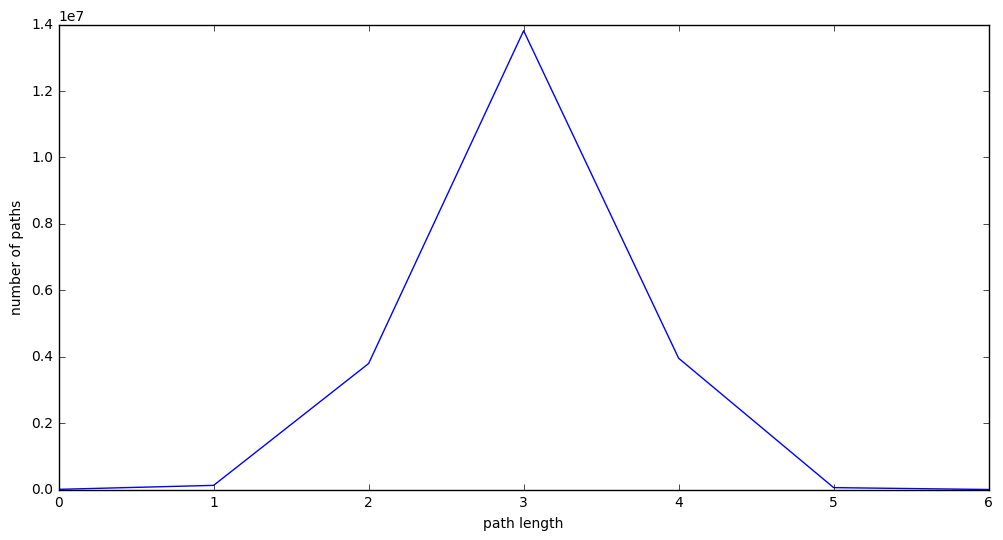

In [23]:
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

# Plot the distribution
x = range(len(shortest_paths_all_actors_count.keys()))
y = shortest_paths_all_actors_count.values()
print y
plt.figure(figsize=(12, 6))
plt.xlabel('path length')
plt.ylabel('number of paths')
plt.plot(x, y)
plt.show()

Majority of the actors is only 3 handshakes from each other. That is ilustrating the most how dense the structure of actors netwrk is. The longest route is 6 which is still less than global average -7. It means that the holywood is very dense and everybody know everyone each other. 

# 2nd Network
Analysis of another network consisted of Directors directly connected to the actors to check which director has the biggest community of actors. 

In [24]:
directors_network = nx.DiGraph()

for movie in main_movies:
    directors_network.add_node(main_movies[movie]["director"])

for movie in main_movies:
    directors_network.add_edge(main_movies[movie]["director"], main_movies[movie]["actor1"], weight =1)
    directors_network.add_edge(main_movies[movie]["director"], main_movies[movie]["actor2"], weight =1)
    directors_network.add_edge(main_movies[movie]["director"], main_movies[movie]["actor3"], weight =1)
    directors_network.add_edge(main_movies[movie]["director"], main_movies[movie]["actor4"], weight =1)
    directors_network.add_edge(main_movies[movie]["director"], main_movies[movie]["actor5"], weight =1)
    directors_network.add_edge(main_movies[movie]["director"], main_movies[movie]["actor6"], weight =1)
    
dir_net_num_of_nodes = directors_network.number_of_nodes()
print('Number of nodes: ' + str(dir_net_num_of_nodes))

dir_net_num_of_links = directors_network.number_of_edges()
print('Number of links: ' + str(dir_net_num_of_links))

directors_degree = nx.degree(directors_network)

directors_degree_names = []
directors_degree_values = []
for i in directors_degree:
    directors_degree_names.append(i)
    directors_degree_values.append(directors_degree[i])
    
# Combining lists of names and values
directors_degree_list = zip(directors_degree_names, directors_degree_values)

# Sort by values
directors_degree_sorted = sorted(directors_degree_list, key=lambda tup: tup[1], reverse=True)


print "\n20 Directors with the greatest actors network:"
for ii in directors_degree_sorted[0:20]:
    print(ii[0] + ' with value of ' + str(ii[1]))



    

Number of nodes: 6448
Number of links: 24539

20 Directors with the greatest actors network:
Woody Allen with value of 146
Steven Spielberg with value of 109
Clint Eastwood with value of 105
Ridley Scott with value of 99
Ron (I) Howard with value of 95
Oliver (I) Stone with value of 84
Steven Soderbergh with value of 81
Barry (I) Levinson with value of 81
Renny Harlin with value of 78
Joel Schumacher with value of 77
Rob Reiner with value of 76
Spike Lee with value of 74
Tony (I) Scott with value of 69
Chris Columbus with value of 66
Stephen Herek with value of 66
Garry (I) Marshall with value of 65
Robert Zemeckis with value of 64
Tim (I) Burton with value of 64
Martin (I) Scorsese with value of 63
Ivan Reitman with value of 62


Number of nodes in this network represents both directors as well as actors. The highest community of actors have Woody Allen but he directed the most - 31 movies. Second one is Steven Spielber who directed 19 movies similiar to the Clint Eastwood who was third in our statistics. It is obvious that the number of movies which he directed but some of the directors prefer to work always with the same actors or create movies in series which has to have the same actors in different episodes. 

# 3rd Network
Network consisted of directors as a nodes with edges between them representing actors. 

In [25]:
directors_as_a_node_network = nx.Graph()

dir_act = defaultdict(set)

for title in main_movies:
    cur_movie_data = main_movies[title]
    cur_dir = cur_movie_data["director"]
    cur_cast = [cur_movie_data["actor1"], cur_movie_data["actor2"], cur_movie_data["actor3"],
                cur_movie_data["actor4"], cur_movie_data["actor5"], cur_movie_data["actor6"]]

    dir_act[cur_dir].update(cur_cast)

for dir1 in dir_act:
    cast1 = dir_act[dir1]
    for dir2 in dir_act:
        if dir1 != dir2:
            cast2 = dir_act[dir2]
            common = cast1.intersection(cast2)
            if len(common) > 0:
                for act in common:
                    # add edge between dir1 and dir2
                    directors_as_a_node_network.add_edge(dir1, dir2, weight =1)
                    
            common = []



            
dir_net_num_of_links = directors_as_a_node_network.number_of_edges()
print('Number of links: ' + str(dir_net_num_of_links))

num_of_nodes = directors_as_a_node_network.number_of_nodes()
print('Number of nodes: ' + str(num_of_nodes))


Number of links: 121251
Number of nodes: 1921


In [26]:
# Betweenness centrality for 'directors_as_a_node_network'
between_centrality = nx.betweenness_centrality(directors_as_a_node_network)

# Go through 'between_centrality' and add to two lists (names and values)
between_centrality_names = []
between_centrality_values = []
for i in between_centrality:
    between_centrality_names.append(i)
    between_centrality_values.append(between_centrality[i])
    
# Combining lists of names and values
between_centrality_list = zip(between_centrality_names, between_centrality_values)

# Sort by values
between_centrality_sorted = sorted(between_centrality_list, key=lambda tup: tup[1], reverse=True)

# Print the top 10
for ii in between_centrality_sorted[0:10]:
    print(ii[0] + ' with value of ' + str(ii[1]))

Woody Allen with value of 0.0187819014826
Ridley Scott with value of 0.0151728436898
Steven Spielberg with value of 0.0125917903898
Clint Eastwood with value of 0.0111515532796
Ron (I) Howard with value of 0.0105641215123
Oliver (I) Stone with value of 0.010556704873
Tony (I) Scott with value of 0.00922967454605
Barry (I) Levinson with value of 0.00885625115466
Walter (I) Hill with value of 0.00864140195794
Joel Schumacher with value of 0.00863278629818


The results of betweenes centrality measurement definitely makes sense based on the finding above. Woody Allen has the highest betweenes centrality becasue of the fact that his network of actors is the biggest. He is the most central Director. THe same is with the other Directors who are in the top 10 of most central directors. They are all directors who produced a lot of movies. But based on that we can say that our data are a bit different and Ridley Scott who is not the second director in terms of amount of actors in the network is the second most central director. It means that the actors who he was working with are more central which means that they have potentially stronger network and are more known in this Hollywood world. 

In [27]:
# Eigenvector centrality 
eigenvector_centrality_in = nx.eigenvector_centrality(directors_as_a_node_network)

# Go through 'eigenvector centrality_in' and add to two lists (names and values)
eigenvector_centrality_in_names = []
eigenvector_centrality_in_values = []
for i in eigenvector_centrality_in:
    eigenvector_centrality_in_names.append(i)
    eigenvector_centrality_in_values.append(eigenvector_centrality_in[i])
    
# Combining lists of names and values
eigenvector_centrality_in_list = zip(eigenvector_centrality_in_names, eigenvector_centrality_in_values)

# Sort by values
eigenvector_centrality_in_sorted = sorted(eigenvector_centrality_in_list, key=lambda tup: tup[1], reverse=True)

# Print the top 5
for ii in eigenvector_centrality_in_sorted[0:20]:
    print(ii[0] + ' with value of ' + str(ii[1]))

Woody Allen with value of 0.0950294577375
Steven Spielberg with value of 0.0912651602567
Barry (I) Levinson with value of 0.0894931214361
Oliver (I) Stone with value of 0.0880117134816
Ron (I) Howard with value of 0.0870836666393
Ridley Scott with value of 0.0865413671453
Tony (I) Scott with value of 0.0833347931727
Clint Eastwood with value of 0.0819358447652
Joel Schumacher with value of 0.0816934582326
Martin (I) Scorsese with value of 0.0814357425669
Steven Soderbergh with value of 0.0787542127529
Michael (I) Bay with value of 0.0775885608277
Ethan Coen with value of 0.0765195862013
Spike Lee with value of 0.0734792483432
Robert Zemeckis with value of 0.0733179997185
Mike (I) Nichols with value of 0.0731948556936
Tim (I) Burton with value of 0.0714182947515
Ivan Reitman with value of 0.0710576774678
Rob Reiner with value of 0.070045195902
Walter (I) Hill with value of 0.06871236156


The measure of eigenvector centrality seems to show us that still Woody Allen is the most important director in hollywood and his persona has the most influence on the whole network. The second one is Steven Spielberg as well as Barry Levinson who is third in terms of eigenvector centrality. Ridley Scott is 6th. Key finding is also that the differences between eigenvector centralities between 1st and 20th director are minimal around 2.5% which is not a lot in terms of such a dense network. 

In [30]:
# Most profitable directors - we don't have directors ranking but we can calculate the most profitable one by adding their movie
# profits

directorProfi = defaultdict(float)
directorProfiRate = defaultdict(float)
for movie,val in main_movies.iteritems():
    directorProfi[val['director']] += (float(val['gross'])-float(val['budget']))
    directorProfiRate[val['director']] += (float(val['gross'])/float(val['budget']))

    
sorted_dir_rofit = sorted(directorProfi.items(), key=operator.itemgetter(1),reverse=True)
print "\nThe most profitable directors (what was their total gross): \n"
for item in sorted_dir_rofit[:20]:
    print item
    
sorted_dir_rofit_rate = sorted(directorProfiRate.items(), key=operator.itemgetter(1),reverse=True)
print "\nThe most profitable directors (how many times they multiply their movie budget):  \n"
for item in sorted_dir_rofit_rate[:20]:
    print item



The most profitable directors (what was their total gross): 

('James (I) Cameron', 5352523491.0)
('Steven Spielberg', 5300032117.0)
('Peter (I) Jackson', 5290495080.0)
('Michael (I) Bay', 4384075304.0)
('David (II) Yates', 3677840001.0)
('Chris Columbus', 3301930295.0)
('Christopher (I) Nolan', 3222483234.0)
('Carlos (I) Saldanha', 2682311307.0)
('Roland Emmerich', 2558370399.0)
('Tim (I) Burton', 2558049678.0)
('Gore Verbinski', 2548742008.0)
('J.J. Abrams', 2546319903.0)
('Francis (II) Lawrence', 2504026575.0)
('James (I) Wan', 2246699771.0)
('Sam Raimi', 2245112627.0)
('Robert Zemeckis', 2185318247.0)
('George (I) Lucas', 2182197773.0)
('Ron (I) Howard', 2175879421.0)
('Ridley Scott', 2166785893.0)
('Sam (I) Mendes', 2044100904.0)

The most profitable directors (how many times they multiply their movie budget):  

('James (I) Wan', 217.00915244692982)
('Jared (I) Hess', 115.29365)
('Chris Columbus', 100.08403395480676)
('Steven Spielberg', 90.69430998957387)
('Les Mayfield', 83.87

# Community Detection in the Actor's Network

We group actors into the genre they appear most in to try to detect if the genres are good communities.

In [31]:
# List of columns names for actors in dataset
actors_list = ["actor1", "actor2", "actor3", "actor4", "actor5", "actor6"]

# Add every genre which actor has been in
actors_genres = defaultdict(list)
for movie in main_movies:
    for actor in actors_list:
        actors_genres[main_movies[movie][actor]].append(main_movies[movie]["genre"])

In [32]:
from collections import Counter

# Add actors to the genre they appear most in
actors_top_genres = {}
for actor in actors_genres:
    count = Counter(actors_genres[actor])
    actors_top_genres[actor] = count.most_common(1)[0][0]

In [33]:
# Print the genres and how many actors they have
genres_num_of_actors = Counter(actors_top_genres.values())
print "List of how many actors each genre has:"
for i in genres_num_of_actors:
    print(str(i) + ": " + str(genres_num_of_actors[i]))

List of how many actors each genre has:
Mystery: 23
Romance: 2
Sci-Fi: 3
Family: 3
Horror: 193
Thriller: 4
Crime: 151
Drama: 970
Fantasy: 9
Animation: 20
Music: 1
Adventure: 183
Action: 1345
Comedy: 1628
Documentary: 24
War: 2
Biography: 102


In [34]:
#Group actors to their specific genre
genres_actors = defaultdict(list)
for actor in actors_top_genres:
    genres_actors[actors_top_genres[actor]].append(actor)

In [35]:
# Create subgraphs in actors_network based on genre the actor is in
genres_subgraphs = {}
for genre in genres_actors:
    genres_subgraphs[genre] = actors_network.subgraph(genres_actors[genre])

In [36]:
# Modularity: Mc = (Lc/L) - (Kc/2*L)^2
# Lc is the total number of links within the community
# and kc is the total degree of the nodes in this community

# Total links in the network
L = len(actors_network.edges())

# Go through each subgraph and calculate its modularity
total_modularity = 0
for subgraph in genres_subgraphs:
    Lc = len(genres_subgraphs[subgraph].edges())
    Kc = len(genres_subgraphs[subgraph].nodes())
    modularity = (float(Lc)/float(L)) - ((float(Kc)/(2*float(L))))**2
    print(subgraph + ' modularity is ' + str(modularity))
    total_modularity += modularity

print "\nModularity of the Actor's Network is %s" % total_modularity

Mystery modularity is 0.000208995908167
Drama modularity is 0.0549944970595
Sci-Fi modularity is -5.81719298243e-10
Family modularity is 1.6078656768e-05
Horror modularity is 0.00379229267609
Crime modularity is 0.00207274801133
Romance modularity is -2.5854191033e-10
Fantasy modularity is 3.21532415008e-05
Animation modularity is 0.000176845769169
Music modularity is -6.46354775826e-11
Adventure modularity is 0.00419451666767
Action modularity is 0.14438718909
Comedy modularity is 0.222783412029
Documentary modularity is 0.000418022970634
War modularity is 1.60789799454e-05
Thriller modularity is -1.03416764132e-09
Biography modularity is 0.000964081841727

Modularity of the Actor's Network is 0.434056910962


In [41]:
import community

# Modularity based on the Louvain algorithm
partition = community.best_partition(actors_network)
modularity = community.modularity(partition, actors_network)
print "Modularity of the Actor's Network is %s according to the Louvain algorithm" % modularity

Conclusion: 
Network of actors is very dense and there is a lot of communities but they are small compare to the network size so it is difficult to detect them. Our network had quite big modularity when we divide it according to the genres of the movies but ist is not the best classification comparing ot hte Louvain algorithm. We got modularity almost twice bigger than Louvain algorithm. It is also showing that our network is very complex and there is not simple one feature which differentiate dataset to the communities. 